# Aim
Check whether DECD param give consistent fidelities with Qutip Simulations

# Imports

In [1]:
import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')
#sys.path.append('C:\\_Lib\\python\\ECD_control')
#sys.path.append('C:\\_Lib\\python')

In [2]:
# for param file 
#%%
# note: timestamp can't use "/" character for h5 saving.
TIMESTAMP_FORMAT = "%Y-%m-%d %H:%M:%S"
END_OPT_STRING = "\n" + "=" * 60 + "\n"
import numpy as np
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # supress warnings
import h5py

# print(
#     "\nNeed tf version 2.3.0 or later. Using tensorflow version: "
#     + tf.__version__
#     + "\n"
# )
import ECD_control.ECD_optimization.tf_quantum as tfq
from ECD_control.ECD_optimization.visualization import VisualizationMixin
import qutip as qt
import datetime
import time

In [3]:
# for pulse file
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
from scipy.optimize import fmin



# Finding Param

In [14]:
%load_ext autoreload
%autoreload 2

In [15]:
from DECD_param import FixedBatchOptimizer as BO
from qutip import *

In [16]:
N1 = 15
N2 = 15

In [17]:
#Initial oscillator state.
Fock1 = 0
Fock2= 1
psi_i1 = qt.basis(N1,Fock1) #initial state
psi_i2 = qt.basis(N2,Fock2)
initial1 = qt.tensor(basis(2,0), psi_i1, psi_i2)

#Target
Fock1 = 1
Fock2= 0
psi_t1 = qt.basis(N1,Fock1) #target state
psi_t2 = qt.basis(N2,Fock2)
target1 = qt.tensor(basis(2,0), psi_t1, psi_t2)
#-------------------------------------------------------
#Second state 
#Initial oscillator state.
Fock1 = 0
Fock2= 2
psi_i1 = qt.basis(N1,Fock1) #initial state
psi_i2 = qt.basis(N2,Fock2)
initial2 = qt.tensor(basis(2,0), psi_i1, psi_i2)


#Target
Fock1 = 2
Fock2= 0
psi_t1 = qt.basis(N1,Fock1) #target state
psi_t2 = qt.basis(N2,Fock2)
target2 = qt.tensor(basis(2,0), psi_t1, psi_t2)

#-------------------------FUll list
initial = [initial1, initial2]
target = [target1, target2]

In [18]:


# #Optimization of ECD Circuit parameters (betas, gammas, phis, and thetas)
# #the optimization options
# opt_params = {
# 'N_blocks' : 10, #circuit depth
# 'N_multistart' : 20, #Batch size (number of circuit optimizations to run in parallel)
# 'epochs' : 100, #number of epochs before termination
# 'epoch_size' : 20, #number of adam steps per epoch
# 'learning_rate' : 0.01, #adam learning rate
# 'term_fid' : 0.999, #terminal fidelitiy
# 'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
# 'beta_scale' : 3.0, #maximum |beta| for random initialization
# 'gamma_scale' : 3.0, #maximum |gamma| for random initialization
# 'N_cav1': N1, #number of levels in mode 1
# 'N_cav2': N2, #number of levels in mode 2
# 'initial_states' : initial, #qubit tensor oscillator, start in |g> |0>
# 'target_states' : target, #end in |e> |target>.
# #"initial_params": init_params,
# 'name' : 'Fock1 %d' % Fock1, #name for printing and saving
# 'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
# }



In [19]:
# opt = BO(**opt_params)
# opt.print_info()

In [20]:
#opt.optimize()

In [21]:
# saving angles 
# betas = opt.best_circuit()['betas']
# gammas = opt.best_circuit()['gammas']
# phis = opt.best_circuit()['phis']
# thetas = opt.best_circuit()['thetas']
# etas = opt.best_circuit()['etas']
# params = [np.real(betas), np.imag(betas), np.real(gammas), np.imag(gammas), phis, thetas, etas]
# for i in range(len(params)):
#     params[i] = [float(k) for k in params[i]]

# fname = 'Test_01_10_May20.txt'
# a_file = open(fname, "w")
# np.savetxt(a_file, params)
# a_file.close()

In [22]:
import pandas as pd
filename = "Parameter Dataset/01_02_to_10_20_Aug22_num_layers_params2.csv"
df = pd.read_csv(filename)
df

,layers,exact fidelity,bo_fidelity,betas_r,betas_i,gammas_r,gammas_i,phis,thetas
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.0,0.950433,0.950428,"[0.13488929, -0.2279579, 1.1900711, 0.43509567...","[-0.10712488, 0.13559133, -0.6507451, -0.58729...","[-0.36237377, 0.23904443, 1.3408138, 1.0947008...","[0.06904714, 0.6659791, -0.5523455, -0.571282,...","[0.0, -1.5908473, 1.6203401, -1.4826386, 1.664...","[-1.6425663, -1.1996397, 1.4210985, -1.4897145..."
2,11.0,0.954552,0.954550,"[0.17285644, -0.78989404, 1.00309, -0.5262413,...","[0.3270558, 0.25732112, -0.19401479, 1.3082457...","[0.16590686, -0.5419412, 1.4737059, -1.1924573...","[0.45779866, 0.17935115, 0.23337753, 0.2415098...","[0.0, -1.571004, -1.5705906, -1.5708115, 1.570...","[-1.5709168, 1.2717078, -1.738396, -0.3062799,..."
3,13.0,0.956682,0.957655,"[-1.4959601, 0.12065852, 0.40640476, 0.7171700...","[2.0538573, -0.066538274, 0.1521077, -1.302695...","[0.7590362, 0.39382485, 0.72901905, 0.6690943,...","[-1.9477248, -0.23904711, 0.39981893, -1.13129...","[0.0, -1.0908506, -3.0995948, -0.6191318, 1.59...","[-0.0011246204, -1.5681852, 1.6403506, 2.06515..."
4,13.0,0.981797,0.981802,"[-0.55120164, -0.26413783, 0.5694336, -0.39084...","[0.11368107, 0.03817838, 0.94696426, -0.649437...","[-0.8165003, -0.41371986, 0.8166411, -0.142674...","[0.5218695, 0.21521403, 1.2906123, -1.0564995,...","[0.0, 0.21140075, -1.2504648, 2.8021662, 0.734...","[2.808502, -1.8815978, 1.4713604, 0.7745781, -..."
5,15.0,0.985925,0.985947,"[-0.18695492, 0.17229891, -0.17504913, -0.6303...","[-0.070156455, 0.13179556, -1.217374, 0.315337...","[-0.34952122, 0.6596686, 0.13092962, -0.603915...","[0.20513599, 0.3609476, -1.2222039, 0.31950614...","[0.0, 1.571028, -1.5699112, -1.5698866, -1.568...","[1.5700514, -1.4775774, 2.0863497, -2.3104353,..."
6,15.0,0.990933,0.990956,"[-0.39078707, 0.18847182, 0.29060218, 1.399566...","[-0.057829283, 0.023464171, 0.2994163, -0.6007...","[-0.6865383, 0.30181718, 0.45632124, 1.4483935...","[0.058809236, -0.025054052, 0.61380696, -0.519...","[0.0, -0.1189425, 1.4212506, -0.037353754, 0.3...","[2.507467, 1.0317829, -1.5424844, 2.2423637, 2..."
7,17.0,0.968406,0.970360,"[-1.261571, 0.5790969, 0.80223453, -0.29630548...","[-0.8183748, -0.9400312, -0.9215564, 0.0637713...","[-0.4423089, 0.4796788, 0.8411447, 0.013118093...","[-1.3772258, -1.0527383, -1.2460705, 2.2957022...","[0.0, -2.3265374, 2.7020667, -0.8680494, 3.033...","[-0.022977114, 1.5625865, -2.8954318, -1.28320..."
8,17.0,0.967438,0.966374,"[-0.84624076, 0.29551956, -0.75942636, 1.17960...","[-1.6586634, 0.8594143, -0.7507899, 0.8756961,...","[0.84059894, 0.7466078, -0.7993753, 1.3652034,...","[-1.3777792, 1.3321187, -1.1105727, 0.83760595...","[0.0, 0.5394285, -2.9409158, -0.28232503, 2.20...","[-0.00906992, -1.5698419, 0.78630114, -0.76380..."
9,19.0,0.802781,0.924771,"[-0.041785516, -1.2308215, -0.18990034, 0.3572...","[-0.12104536, 0.6925767, -0.589619, -5.4890113...","[-0.17973909, -1.7396103, 0.21676445, -0.03138...","[-0.6266825, 0.9689894, -0.75531393, -0.067162...","[0.0, 1.5752137, -1.5517662, -1.5556042, 2.666...","[-1.5484432, 1.507437, 1.7432683, 0.8913791, -..."


In [23]:
#taking parameters from the dataset
import ast
k = 6 #best result 0.99 fidelity
param_df = df

betas_r = ast.literal_eval(param_df['betas_r'][k])
betas_i = ast.literal_eval(param_df['betas_i'][k])
gammas_r = ast.literal_eval(param_df['gammas_r'][k])
gammas_i = ast.literal_eval(param_df['gammas_i'][k])

betas = np.asarray([complex(betas_r[l], betas_i[l]) for l in range(len(betas_r))] )
gammas = np.asarray([complex(gammas_r[l], gammas_i[l]) for l in range(len(gammas_r))] )
#print(betas)

phis = np.asarray(ast.literal_eval(param_df['phis'][k]))
thetas = np.asarray(ast.literal_eval(param_df['thetas'][k]))

# Calculator

In [24]:
from qutip import *

In [25]:
def mod_disp_op(disp, n_q, n_c):
    '''
    Returns displacement operator using baken campbell formula
    '''
    pauli_like_x = (create(n_c) + destroy(n_c))
    pauli_like_y = (1j)*(create(n_c) - destroy(n_c))
    comm = (1/2)*((pauli_like_x*pauli_like_y) - (pauli_like_y*pauli_like_x))
    re = np.real(disp)
    im = np.imag(disp)

    first = (1j*im*pauli_like_x).expm()
    second = (-1j*re*pauli_like_y).expm()
    third = ((im*re)*(-1)*comm).expm()
    return first*second*third

def disp_op(disp, n_q, n_c):
    '''
    Returns displacement operator for specified displacement
    '''
    #disp = normalize_complex(disp)
    exponent = (disp*create(n_c))- (np.conjugate(disp)*destroy(n_c))
    return  exponent.expm()

def cond_disp_op(beta, n_q, n_c1, n_c2,mode, use_mod):
    '''
    Returns cond displacement operator for specified real displacement
    '''
    disp = beta/2
    
    n_c = n_c1 if mode == 1 else n_c2
    
    if use_mod: 
        d = mod_disp_op(disp= disp, n_q = n_q, n_c = n_c) #Baker Campbell Approx
    else: 
        d = disp_op(disp= disp, n_q = n_q, n_c = n_c)
    d_adjoint = d.dag()
    
    if mode == 1: 
        left = tensor(create(n_q), d, qeye(n_c2)) #D(beta/2)|e><g|
        right = tensor(destroy(n_q), d_adjoint, qeye(n_c2)) #D(-beta/2)|g><e|   ...not sure d_adjoint(alpha) = d(-alpha) if use Baker
    
    else: #mode ==2 
        left = tensor(create(n_q), qeye(n_c2), d)
        right = tensor(destroy(n_q),  qeye(n_c2), d_adjoint)
    return left+right

def qubit_rot(phi, theta, n_q, n_c1, n_c2):
    '''
    Returns qubit rotation
    '''
    rot = (np.cos(phi)*sigmax()) + (np.sin(phi)*sigmay())
    exp = (-1.0j)*(theta/2)*(rot)
    return tensor(exp.expm(), qeye(n_c1), qeye(n_c2) )

def normalize_complex(number):
    '''
    Returns radius r of complex number z = r*e^iphi
    '''
    return np.sqrt(number.real**2 + (number .imag**2))

def dot(state1, state2):
    '''
    dotting both states
    '''
    fid = state1.overlap(state2)
    return fid*np.conjugate(fid)

def evolve(initial_state, betas, gammas, phis, thetas, n_q, n_c1, n_c2, use_mod = False):
    '''
    Operates on initial_state with ECD(beta_n)*R(phi_n, theta_n) *...........*ECD(beta_1)*R(phi_1, theta_1)
    '''
    n = len(betas)
    state = initial_state
    for i in range(n):
        beta = betas[i]
        gamma = gammas[i]
        phi = phis[i]
        theta = thetas[i]
        
  
    
        #state = cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)*state
        state = cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)*state
           
    return state
        
        

In [26]:
# initial = tensor(basis(2, 0), basis(N1, 0), basis(N2, 1))
# target = tensor(basis(2, 0), basis(N1, 1), basis(N2, 0))
# pi_target = tensor(basis(2, 1), basis(N1, 1), basis(N2, 0))

In [31]:
rho_calc = evolve(initial[0],betas,gammas, phis, thetas,n_q = 2,n_c1 = N1, n_c2 = N2,
                   use_mod = True)
fid1 = dot(target[0], rho_calc)
fid1

(0.9927775512081825+0j)

In [32]:
rho_calc = evolve(initial[1],betas,gammas, phis, thetas,n_q = 2,n_c1 = N1, n_c2 = N2,
                   use_mod = True)
fid2 = dot(target[1], rho_calc)
fid2

(0.9891140837804437+0j)

In [29]:
np.mean([fid1, fid2])

(0.9909458174943131+0j)

In [59]:
opt.best_circuit()['fidelity']

0.5176234

In [60]:
# opt.batch_construct_block_operators(
#         opt.betas_rho, 
#     opt.betas_angle,opt.gammas_rho, opt.gammas_angle,
#         opt.alphas1_rho, opt.alphas1_angle, opt.alphas2_rho, opt.alphas2_angle,
#         opt.phis, opt.etas, opt.thetas)

In [61]:
# i= 0 
# beta = betas[i]
# gamma = gammas[i]
# phi = phis[i]
# theta = thetas[i]
# n_q = 2
# n_c1 = N1
# n_c2 = N2
# use_mod = True
  
# cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)
           

# Pulse

In [33]:
from DECD_pulse import *

In [34]:
#Our cavity and qubit. When using pulse construction on the FPGA, these objects can be loaded, and 
#Here, we are making a "FakeCavity" and a "FakeQubit" with parameters found from experimental calibrations.

storage1_params = {
        "chi_kHz": -33, #dispersive shift
        "chi_prime_Hz": 0, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not yet implemented.
        "epsilon_m_MHz": 400, #largest oscillator drive amplitude in MHz (max|epsilon|)
        "unit_amp": 0.01, #DAC unit amp of gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement sigma
        "chop": 4, #oscillator displacement chop (number of stds. to include in gaussian pulse)
    }
storage2_params = {
        "chi_kHz": -33, #dispersive shift
        "chi_prime_Hz": 0, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not yet implemented.
        "epsilon_m_MHz": 400, #largest oscillator drive amplitude in MHz (max|epsilon|)
        "unit_amp": 0.01, #DAC unit amp of gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement sigma
        "chop": 4, #oscillator displacement chop (number of stds. to include in gaussian pulse)
    }
qubit_params = {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.

#calculating conversion between qubit DAC units and MHz (Omega)
pi = rotate(np.pi, phi=0, sigma=qubit_params['sigma'], chop=qubit_params['chop'], dt=1)
Omega_m = np.real(np.max(pi))/qubit_params['unit_amp']

#creating the "Fake storage" and "Fake qubit"
storage1 = FakeStorage(**storage1_params)
storage2 = FakeStorage(**storage2_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD1 = 30
alpha_CD2 = 30
#Small delay to insert between oscillator and qubit pulses
buffer_time = 4

In [35]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1 (assuming amplifiers don't saturate.)
print('Maximum oscillator 1 drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage1.epsilon_m_MHz)
print('Maximum oscillator 2 drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage2.epsilon_m_MHz)
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % qubit.Omega_m_MHz)


Maximum oscillator 1 drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum oscillator 2 drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz


In [37]:
#generating the conditional displacement circuit.
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a displacement
pulse_dict = conditional_displacement_circuit(betas, gammas, phis, thetas, storage1, storage2, qubit,
                     alpha_CD1, alpha_CD2 ,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)
cavity1_dac_pulse, cavity2_dac_pulse, qubit_dac_pulse, = pulse_dict['cavity1_dac_pulse'], pulse_dict['cavity2_dac_pulse'], pulse_dict['qubit_dac_pulse']



---------------------------------------------------
final displacement is 0.3950961297452614
---------------------------------------------------
final displacement is 0.6890525115009684
---------------------------------------------------
final displacement is 0.18995248524428412
---------------------------------------------------
final displacement is 0.3028962086741414
---------------------------------------------------
final displacement is 0.4172526185974606
---------------------------------------------------
final displacement is 0.7648451204129945
---------------------------------------------------
final displacement is 1.5230606901453558
---------------------------------------------------
final displacement is 1.5386965552621545
---------------------------------------------------
final displacement is 0.6215965888394649
---------------------------------------------------
final displacement is 0.5742501338782255
---------------------------------------------------
final displacemen

In [38]:
cavity1_dac_pulse_GHz = (2*np.pi)*(10**(-3))*storage1.epsilon_m_MHz*cavity1_dac_pulse #convert from DAC to Mhz to Ghz
cavity2_dac_pulse_GHz = (2*np.pi)*(10**(-3))*storage2.epsilon_m_MHz*cavity2_dac_pulse #convert from DAC to Mhz to Ghz
qubit_dac_pulse_GHz = (2*np.pi)*10**(-3)*qubit.Omega_m_MHz*qubit_dac_pulse #convert from DAC to Mhz to Ghz

Text(0, 0.5, 'Ghz')

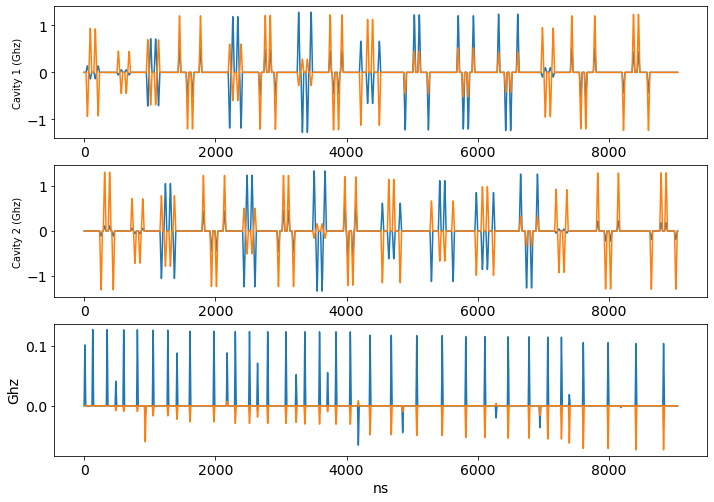

In [39]:
#plotting the pulse in GHz
fig, axs = plt.subplots(3,1)
axs[0].plot(np.real(cavity1_dac_pulse_GHz))
axs[0].plot(np.imag(cavity1_dac_pulse_GHz))
axs[1].plot(np.real(cavity2_dac_pulse_GHz))
axs[1].plot(np.imag(cavity2_dac_pulse_GHz))
axs[0].set_ylabel('Cavity 1 (Ghz)', fontsize = 10)
axs[1].set_ylabel('Cavity 2 (Ghz)', fontsize = 10)
axs[2].plot(np.real(qubit_dac_pulse_GHz))
axs[2].plot(np.imag(qubit_dac_pulse_GHz))
plt.xlabel('ns')
plt.ylabel('Ghz')

In [40]:
def alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha_ = np.zeros_like(epsilon_array)
    alpha = np.array([complex(0,0) for i in range(len(alpha_))])
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    -1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    - 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [41]:
def alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha_ = np.zeros_like(epsilon_array)
    alpha = np.array([complex(0,0) for i in range(len(alpha_))])
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    + 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [42]:
alpha1 = alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array =cavity1_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
alpha1_star = alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array =np.conjugate(cavity1_dac_pulse_GHz) , delta=0, alpha_init=0 + 0j)

In [43]:
alpha2 = alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array =cavity2_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
alpha2_star = alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array =np.conjugate(cavity2_dac_pulse_GHz) , delta=0, alpha_init=0 + 0j)

Text(0, 0.5, 'alpha2')

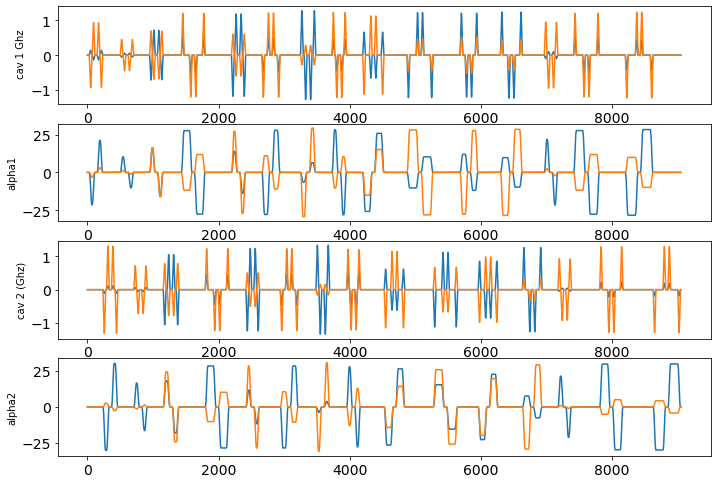

In [44]:
fig, axs = plt.subplots(4,1)
axs[0].plot(np.real(cavity1_dac_pulse_GHz))
axs[0].plot(np.imag(cavity1_dac_pulse_GHz))
axs[0].set_ylabel(' cav 1 Ghz', fontsize = 10)


axs[1].plot(np.real(alpha1))
axs[1].plot(np.imag(alpha1))
axs[1].set_ylabel('alpha1', fontsize = 10)

axs[2].plot(np.real(cavity2_dac_pulse_GHz))
axs[2].plot(np.imag(cavity2_dac_pulse_GHz))
axs[2].set_ylabel('cav 2 (Ghz)', fontsize = 10)

axs[3].plot(np.real(alpha2))
axs[3].plot(np.imag(alpha2))
axs[3].set_ylabel('alpha2', fontsize = 10)

# axs[2].plot(np.real(alpha1_star))
# axs[2].plot(np.imag(alpha1_star))
# axs[2].set_ylabel('alpha1_star', fontsize = 10)
# plt.xlabel('ns')



# axs[2].plot(np.real(alpha2_star))
# axs[2].plot(np.imag(alpha2_star))
# axs[2].set_ylabel('alpha2_star', fontsize = 10)
# plt.xlabel('ns')

# Qutip Simulation

In [45]:
from qutip import *
from qutip.control import *
from math import *

In [46]:
T = len(cavity1_dac_pulse)
times = np.linspace(0, T, T) #1ns timesteps

In [47]:
n_c1 = N1  #number of levels in cavity
n_c2 = N2  #number of levels in cavity
n_q = 2 #number of levels in qubit

#N = 1 #target cavity state

omega_c1  = 5.26 *2*pi   #frequencies in GHz
omega_c2 = 5.26 *2*pi   #frequencies in GHz
omega_q = 6.65*2*pi
#K = -3.7*(10**(-6))*2*pi #cavity nonlinearity

#photon depenedent number shifts
chi1 = storage1_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi1_ = storage1_params["chi_prime_Hz"]*(10**(-9)) #quadratic
chi2 = storage2_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi2_ = storage2_params["chi_prime_Hz"]*(10**(-9)) #quadratic

##mode to mode coupling 
eta = 0#10**(-6)

Assuming both modes have same number of levels

In [48]:
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c1)

a_q = destroy(n_q)
a_c = destroy(n_c1)

adag_q = create(n_q)
adag_c = create(n_c2)

num_q = num(n_q)
num_c =  num(n_c1)


c_ops = []

tlist = times




In [49]:
# Displace Frame hammy
H0_disp = ((chi1/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi2/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE

In [50]:
#for time dep hammy
def mult(a,b):
    '''
    Elementwise multiplication of two lists
    '''
    if len(a) != len(b):
        print('Error with mult: lists must be of same length')
        return []
    return [a[i]*b[i] for i in range(len(a)) ]
    

In [51]:
a = alpha2
b = alpha2_star

In [52]:
# prepping time depedent hammys
alpha1_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha1])
alpha2_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha2])
alpha1_times_2 = mult(alpha1, alpha2)
alpha1star_times_2 = mult(alpha1_star, alpha2)


H = [H0_disp,
     #Qubit drive
    [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
     [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],
     
     # Desired Displacement term from qubit-mode1 coupling
     [(chi1/2)*tensor(sigmaz(), a_c, identity_c), alpha1_star],  
     [(chi1/2)*tensor(sigmaz(), adag_c, identity_c), alpha1],
     
     # Desired Displacement term from qubit-mode2 coupling
     [(chi2/2)*tensor(sigmaz(),  identity_c, a_c), b],  
     [(chi2/2)*tensor(sigmaz(), identity_c, adag_c), a],
     
     # UnDesired Displacement term from mode-mode coupling (no disp^2)
     
#      [(eta)*tensor(identity_q, a_c, num_c), alpha1_star],  
#      [(eta)*tensor(identity_q, adag_c, num_c), alpha1],
#      [(eta)*tensor(identity_q, num_c, a_c), alpha2_star],  
#      [(eta)*tensor(identity_q, num_c, adag_c), alpha2],
     
#      [(eta)*tensor(identity_q, a_c, a_c), np.conjugate(alpha1_times_2)],  
# #      [(eta)*tensor(identity_q, a_c, adag_c), alpha1star_times_2],
#      [(eta)*tensor(identity_q, adag_c, a_c), np.conjugate(alpha1star_times_2)],  
# #     [(eta)*tensor(identity_q, adag_c, adag_c), alpha1_times_2],
     
     # Undesired alpha^2 terms from frequency and mode-mode displacement
#       [(chi1/2)*tensor(sigmaz(), identity_c, identity_c), alpha1_sq],
#      [(chi2/2)*tensor(sigmaz(), identity_c, identity_c), alpha2_sq],
#      [(eta)*tensor(identity_q, identity_c, num_c), alpha1_sq],
#      [(eta)*tensor(identity_q, identity_c, num_c), alpha2_sq]
     ]

In [53]:
psi0 = initial[0]
opts = Options(store_states=True, store_final_state=True,nsteps = 40000,max_step = 10)
output1 = mesolve(H, psi0 , times, c_ops, [], options =opts)
rho = output1.states[-1]

In [54]:
dot(rho, target[0])

(0.9768566859560645+0j)

In [55]:
psi0 = initial[1]
opts = Options(store_states=True, store_final_state=True,nsteps = 40000,max_step = 10)
output2 = mesolve(H, psi0 , times, c_ops, [], options =opts)
rho = output2.states[-1]

In [56]:
dot(rho, target[1])

(0.9791659173839753+0j)

In [57]:
psi0 = (1/np.sqrt(2))*(initial[0] + initial[1])
opts = Options(store_states=True, store_final_state=True,nsteps = 40000,max_step = 10)
output3 = mesolve(H, psi0 , times, c_ops, [], options =opts)
rho = output3.states[-1]

In [58]:
dot(rho, (1/np.sqrt(2))*(target[0] + target[1]))

(0.9781243944854614+0j)

In [52]:
# target_state = tensor(basis(n_q,1), basis(n_c1, 1), basis(n_c2, 0))
# fidelity = rho.overlap(target_state)
# fid = np.sqrt(fidelity.real**2 + fidelity.imag**2)
# print('Fidelity is '+ str(fid))

In [53]:
# target_state = tensor(basis(n_q,0), basis(n_c1, 1), basis(n_c2, 0))
# fidelity = rho.overlap(target_state)
# fid = np.sqrt(fidelity.real**2 + fidelity.imag**2)
# print('Fidelity is '+ str(fid))

In [54]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

In [76]:
def plot_populations(output, figname, title):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k for k in range(len(output.states))]
    max_num_levels = 3 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            axs[0].plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c1, i), basis(n_c2, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i)+',' + str(j)+'>')
            
    axs[1].set_xlabel("Time (ns)", fontsize = 14)
    axs[1].set_ylabel("Populations", fontsize = 14)
    axs[0].set_ylabel("Populations", fontsize = 14)
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()
    fig.suptitle(title, fontsize = 15)
    fig.savefig(figname, dpi = 1000)

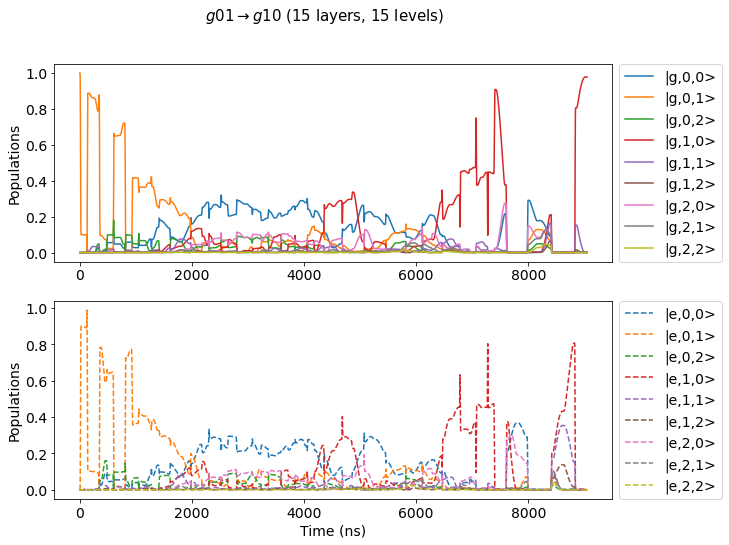

In [77]:
plot_populations(output1, 'g01g02_g20g10_only_g10.png', r'$g01 \rightarrow g10$ (15 layers, 15 levels)',)

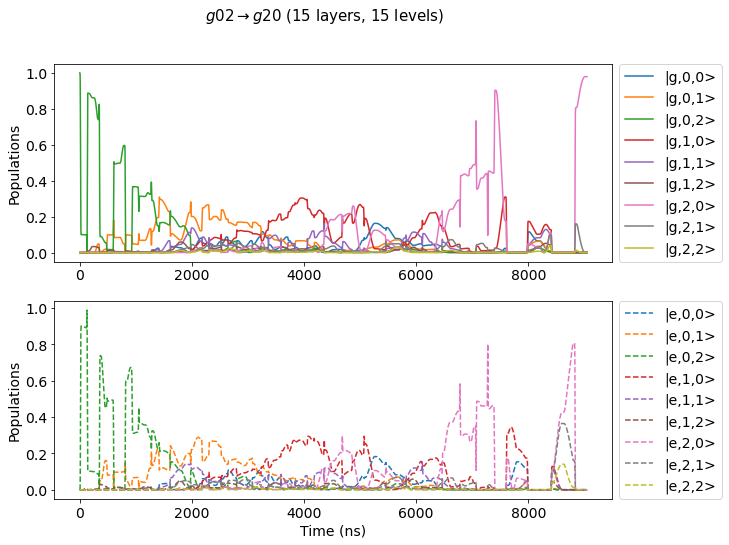

In [78]:
plot_populations(output2, 'g01g02_g20g10_only_g20.png', r'$g02 \rightarrow g20$ (15 layers, 15 levels)')

In [ ]:
plot_populations(output2, 'g01g02_g20g10_only_g20.png', r'$\frac{1}{\sqrt{2}}(g01 + g02) \rightarrow \frac{1}{\sqrt{2}}(g10 + g20)$ (15 layers, 15 levels)')